In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
import seaborn as sns 
import scipy.stats as status
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
# Percenatge of the data missing 
missing_val = data.isnull().sum()
missing_per = (missing_val / len(data)) * 100

In [ ]:
# Droping the None vlaues
clean_data = data.dropna()

In [32]:
clean_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
data = clean_data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Visualise the clean data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data["median_house_value"],
            kde=True,
            color="green")
plt.title("Distribution of the medial house value")
plt.xlabel("Medial House Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Handling the outlier by IQR
Q1 = data.median_house_value.quantile(0.25)
Q3 = data.median_house_value.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [ ]:
condition = (data["median_house_value"] >= lower_bound) & (data["median_house_value"] <= upper_bound)
data_no_outliers = clean_data[condition]

In [ ]:
data = data_no_outliers

<Axes: xlabel='median_income', ylabel='Count'>

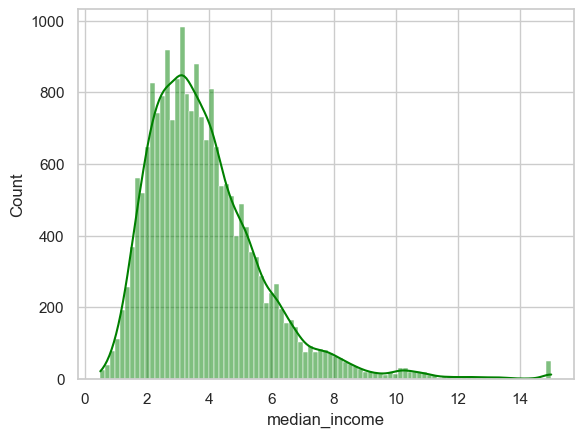

In [30]:
sns.histplot(data=data.median_income, kde=True, color='green')

<Axes: >

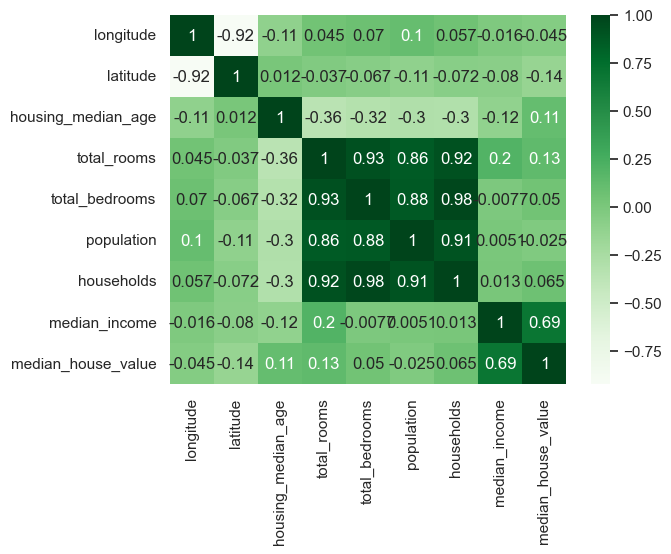

In [40]:
# COrrelation
# Heap maps provide you the co-relation between all the independent vars
# 1. Independent Variables should not highly correlated
# 2. if so drop one columns which are highly co-related by keeping one feature 
# because this already ecxplained the data 


temp_data = data.drop(['ocean_proximity'], axis=1)
sns.heatmap(data=temp_data.corr(), annot=True,
           cmap='Greens')